## get data

In [ ]:
# Перезапускаем среду выполнения и импортируем необходимые библиотеки
import pandas as pd

df = pd.read_csv("../data/normalized_without_outliers_25_55000.csv")
df.shape

In [68]:
import sys
sys.path.append("../")

import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple


from tsmoothie.utils_func import sim_randomwalk
from tsmoothie.smoother import *

<class 'module'>


In [ ]:
# получить X
import numpy as np


X = df.loc[:, "norm_price_1":"norm_price_25"].values  # usual version without norm_floor_price
X.shape

## test different models

## smooth functions

In [97]:
def apply_exponential_smoother(prices: list[float], plt: plt, should_log_data: bool) -> tuple[plt, list[float]]:
    # operate smoothing
    smoother = ExponentialSmoother(window_len=2, alpha=0.1)
    smoother.smooth(prices)

    # generate intervals
    low, up = smoother.get_intervals('sigma_interval')

    # plot the first smoothed timeseries with intervals
    plt.plot(smoother.smooth_data[0], linewidth=3, label="ExponentialSmoother", alpha=0.3)

    if should_log_data:
        print(f"smoth data for ExponentialSmoother is {smoother.smooth_data[0]}")

    return plt, smoother.smooth_data[0]



In [98]:
def apply_convolution_smoother(prices: list[float], plt: plt, should_log_data: bool) -> tuple[plt, list[float]]:
    # operate smoothing
    smoother = ConvolutionSmoother(window_len=4, window_type='ones')
    smoother.smooth(prices)

    # generate intervals
    low, up = smoother.get_intervals('sigma_interval')

    # plot the first smoothed timeseries with intervals
    plt.plot(smoother.smooth_data[0], linewidth=3, label="ConvolutionSmoother", alpha=0.3)
    
    if should_log_data:
        print(f"smoth data for ConvolutionSmoother is {smoother.smooth_data[0]}")

    return plt, smoother.smooth_data[0]


In [99]:
def apply_spectral_smoother(prices: list[float], plt: plt, should_log_data: bool) -> tuple[plt, list[float]]:
    # operate smoothing
    smoother = SpectralSmoother(smooth_fraction=0.3, pad_len=20)
    smoother.smooth(prices)

    # generate intervals
    low, up = smoother.get_intervals('sigma_interval')

    # plot the first smoothed timeseries with intervals
    plt.plot(smoother.smooth_data[0], linewidth=3, label="SpectralSmoother", alpha=0.3)

    if should_log_data:
        print(f"smoth data for SpectralSmoother is {smoother.smooth_data[0]}")

    return plt, smoother.smooth_data[0]

In [100]:
def apply_polynomial_smoother(prices: list[float], plt: plt, should_log_data: bool) -> tuple[plt, list[float]]:
    # operate smoothing
    smoother = PolynomialSmoother(degree=6)
    smoother.smooth(prices)

    # generate intervals
    low, up = smoother.get_intervals('prediction_interval')

    # plot the first smoothed timeseries with intervals
    plt.plot(smoother.smooth_data[0], linewidth=3, label="PolynomialSmoother", alpha=0.3)

    if should_log_data:
        print(f"smoth data for PolynomialSmoother is {smoother.smooth_data[0]}")

    return plt, smoother.smooth_data[0]

In [101]:
def apply_spline_smoother(prices: list[float], plt: plt, should_log_data: bool) -> tuple[plt, list[float]]:
    # operate smoothing
    smoother = SplineSmoother(n_knots=6, spline_type='natural_cubic_spline')
    smoother.smooth(prices)

    # generate intervals
    low, up = smoother.get_intervals('prediction_interval')

    # plot the first smoothed timeseries with intervals
    plt.plot(smoother.smooth_data[0], linewidth=3, label="SplineSmoother", alpha=0.3)

    if should_log_data:
        print(f"smoth data for SplineSmoother is {smoother.smooth_data[0]}")

    return plt, smoother.smooth_data[0]

In [102]:
def apply_gaussian_smoother(prices: list[float], plt: plt, should_log_data: bool) -> tuple[plt, list[float]]:
    # operate smoothing
    smoother = GaussianSmoother(n_knots=5, sigma=0.7)
    smoother.smooth(prices)

    # generate intervals
    low, up = smoother.get_intervals('prediction_interval')

    # plot the first smoothed timeseries with intervals
    plt.plot(smoother.smooth_data[0], linewidth=3, label="GaussianSmoother", alpha=0.3)

    if should_log_data:
        print(f"smoth data for GaussianSmoother is {smoother.smooth_data[0]}")

    return plt, smoother.smooth_data[0]

In [103]:
def apply_binner_smoother(prices: list[float], plt: plt, should_log_data: bool) -> tuple[plt, list[float]]:
    # operate smoothing
    smoother = BinnerSmoother(n_knots=6)
    smoother.smooth(prices)

    # generate intervals
    low, up = smoother.get_intervals('prediction_interval')

    # plot the first smoothed timeseries with intervals
    plt.plot(smoother.smooth_data[0], linewidth=3, label="BinnerSmoother", alpha=0.3)
    
    if should_log_data:
        print(f"smoth data for BinnerSmoother is {smoother.smooth_data[0]}")

    return plt, smoother.smooth_data[0]

In [104]:
def apply_lowess_smoother(prices: list[float], plt: plt, should_log_data: bool) -> tuple[plt, list[float]]:
    # operate smoothing
    smoother = LowessSmoother(smooth_fraction=0.2, iterations=1)
    smoother.smooth(prices)

    # generate intervals
    low, up = smoother.get_intervals('prediction_interval')

    # plot the first smoothed timeseries with intervals
    plt.plot(smoother.smooth_data[0], linewidth=3, label="LowessSmoother", alpha=0.3)

    if should_log_data:
        print(f"smoth data for LowessSmoother is {smoother.smooth_data[0]}")

    return plt, smoother.smooth_data[0]

In [105]:
def apply_kalman_smoother(prices: list[float], plt: plt, should_log_data: bool) -> tuple[plt, list[float]]:
    # operate smoothing
    smoother = KalmanSmoother(component='level_trend', 
                            component_noise={'level':0.1, 'trend':0.1})
    smoother.smooth(prices)

    # generate intervals
    low, up = smoother.get_intervals('kalman_interval')

    # plot the first smoothed timeseries with intervals
    plt.plot(smoother.smooth_data[0], linewidth=3, label="KalmanSmoother", alpha=0.3)

    if should_log_data:
        print(f"smoth data for KalmanSmoother is {smoother.smooth_data[0]}")

    return plt, smoother.smooth_data[0]

## test

[0.51180711 0.50671357 0.49657983 0.49971297 0.51164228 0.51345687
 0.48696322 0.47170562 0.46655501 0.45867865 0.44840797 0.50196883
 0.54186335 0.56475525 0.54223029 0.49196346 0.40355439 0.32722682
 0.31600769 0.33365742 0.37937413 0.44447327 0.53406253]


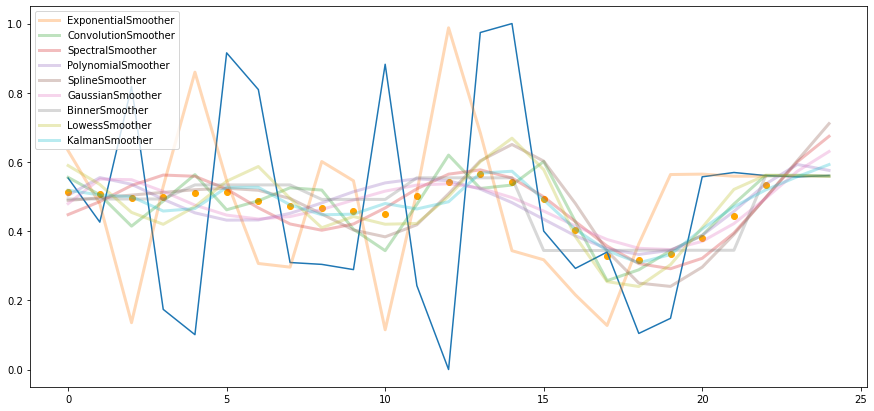

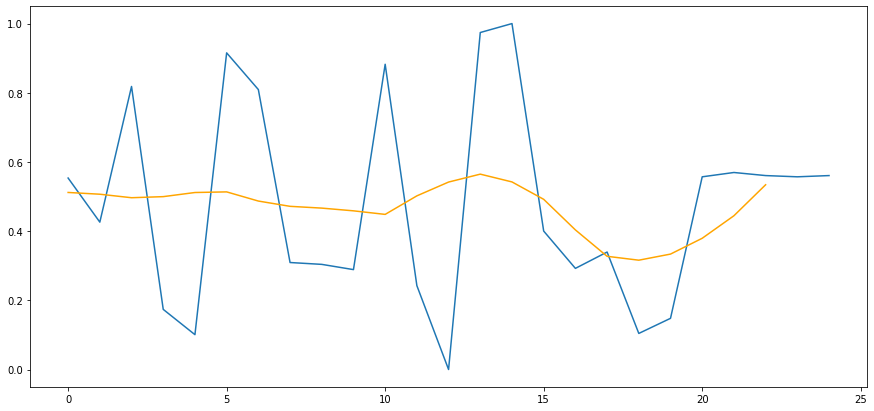

[0.50453919 0.41494952 0.34009707 0.24344901 0.23090488 0.22291509
 0.23739922 0.29912661 0.36496294 0.37833482 0.43064848 0.52407626
 0.58759301 0.66893118 0.76347374 0.8368448  0.83902539 0.84539124
 0.79554122 0.7533207  0.71323502 0.6972523  0.71533047]


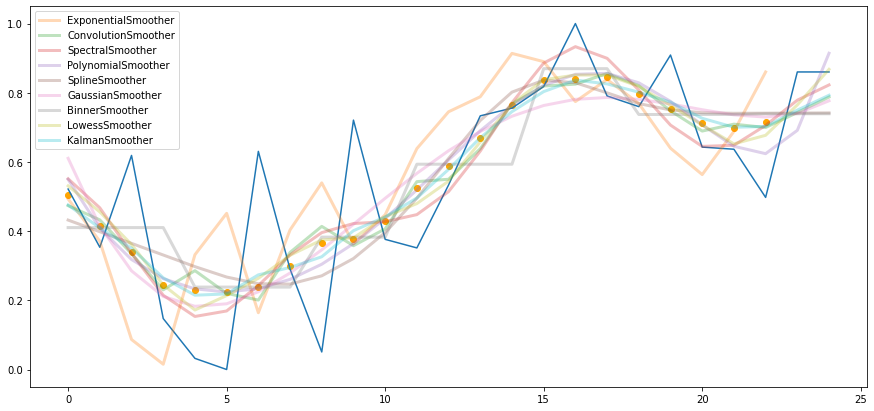

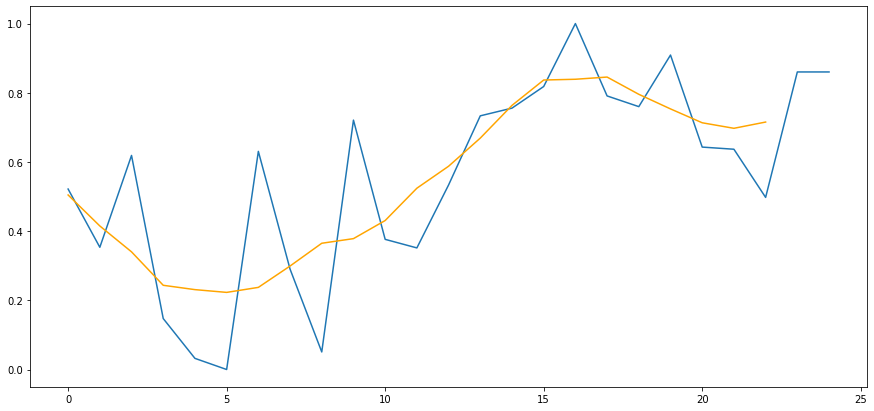

[0.63869553 0.56120652 0.50223295 0.4364444  0.41201532 0.42710955
 0.41276353 0.44955541 0.51537662 0.55541475 0.56784289 0.59013609
 0.59071009 0.59510678 0.58571335 0.60751055 0.67276917 0.72950044
 0.77631721 0.81887117 0.73151588 0.64977004 0.56654876]


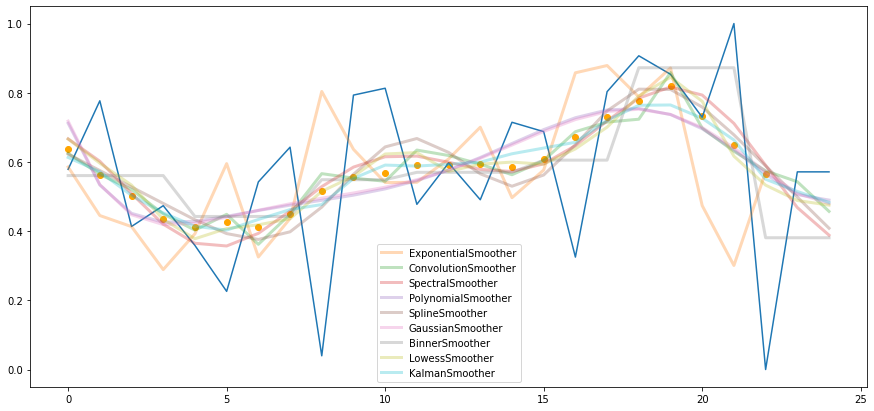

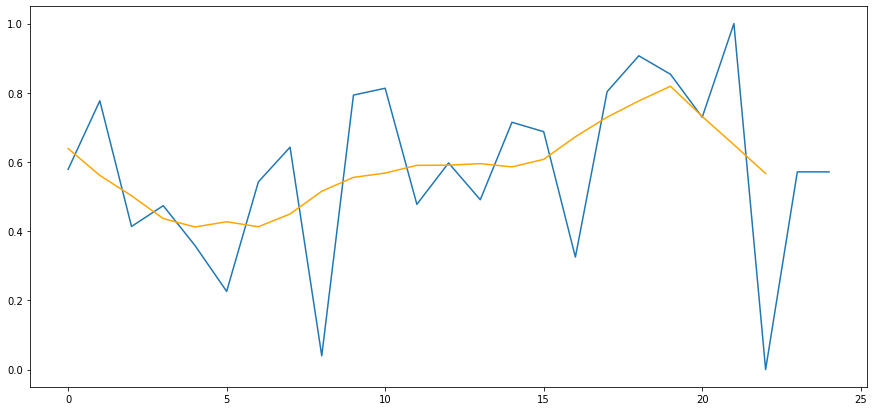

[0.3222666  0.31980504 0.31806807 0.29218293 0.28156489 0.29673096
 0.3170286  0.34637154 0.42154741 0.46731428 0.53124846 0.59226913
 0.57016586 0.54128507 0.49751943 0.40858552 0.42346616 0.51096658
 0.63452109 0.75308575 0.85250244 0.89364646 0.90118092]


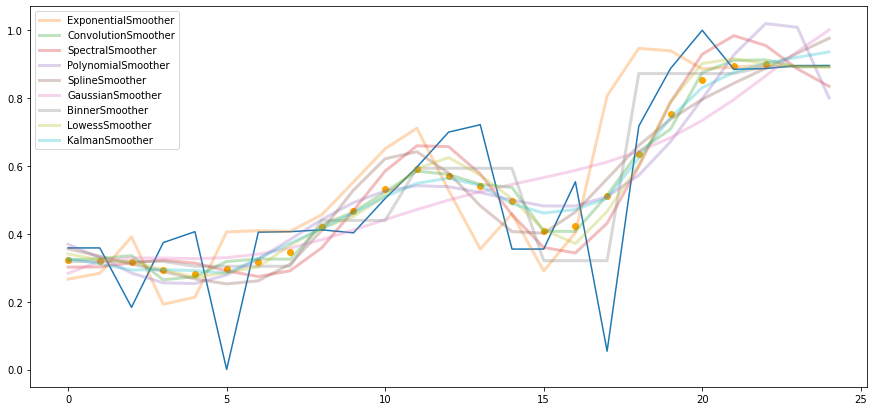

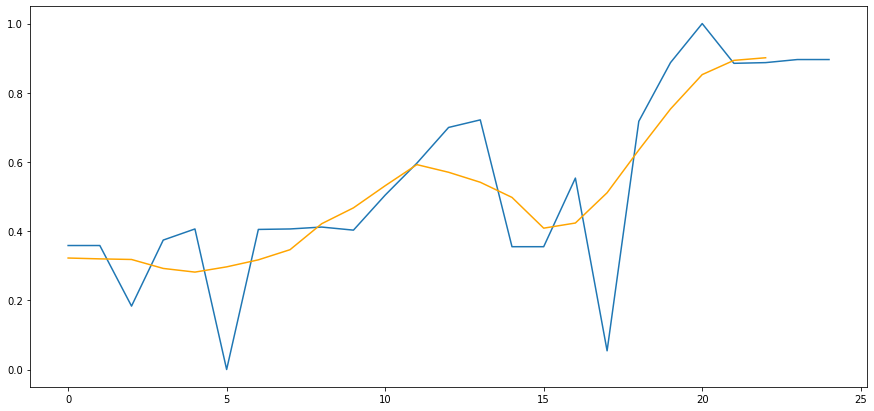

[0.71629367 0.72211326 0.67991498 0.6394215  0.5880946  0.52974145
 0.46879218 0.41630107 0.33770334 0.31035166 0.27770457 0.29765208
 0.30870502 0.33969641 0.36511695 0.41567026 0.37221406 0.35204597
 0.33544703 0.36841636 0.44399192 0.56354275 0.68546733]


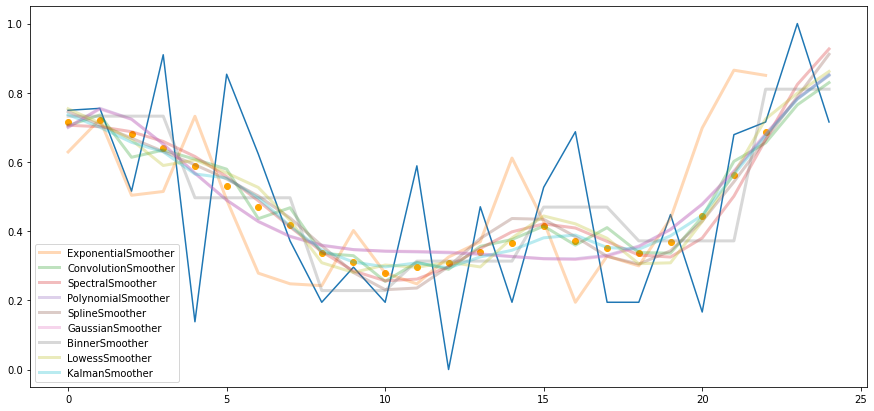

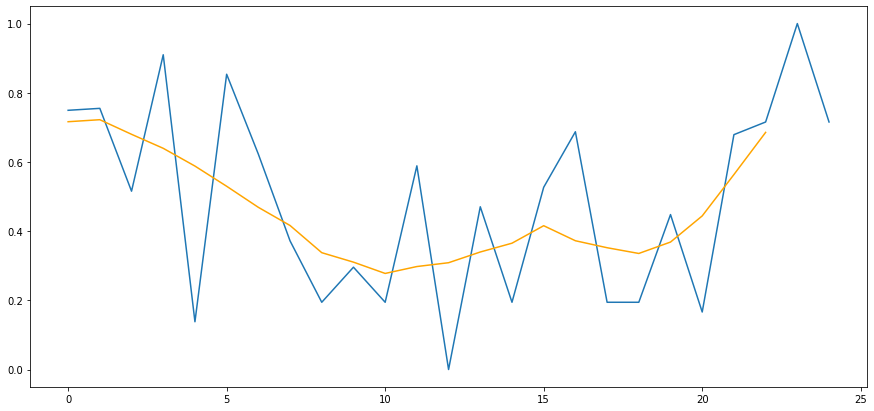

In [106]:
for i in range(5):
    prices = X[i]

    fig = plt.figure(figsize=(15,7))
    plt.plot(prices)

    should_log_data = False

    smoothed_predicts_list = []  # списки предиктов каждого модуля заносятся сюда (9 списков, каждый - список предсказаний)
    
    plt, pred = apply_exponential_smoother(prices, plt, should_log_data=False)
    smoothed_predicts_list.append(pred)
    plt, pred = apply_convolution_smoother(prices, plt, should_log_data=False)
    smoothed_predicts_list.append(pred)
    plt, pred = apply_spectral_smoother(prices, plt, should_log_data=False)
    smoothed_predicts_list.append(pred)
    plt, pred = apply_polynomial_smoother(prices, plt, should_log_data=False)
    smoothed_predicts_list.append(pred)
    plt, pred = apply_spline_smoother(prices, plt, should_log_data=False)
    smoothed_predicts_list.append(pred)
    plt, pred = apply_gaussian_smoother(prices, plt, should_log_data=False)
    smoothed_predicts_list.append(pred)
    plt, pred = apply_binner_smoother(prices, plt, should_log_data=False)
    smoothed_predicts_list.append(pred)
    plt, pred = apply_lowess_smoother(prices, plt, should_log_data=False)
    smoothed_predicts_list.append(pred)
    plt, pred = apply_kalman_smoother(prices, plt, should_log_data=False)
    smoothed_predicts_list.append(pred)

    # не все возвращают полное кол-во значений, так как некоторые используют оконные функции
    smoothed_predicts_list = [module_predict[:23] for module_predict in smoothed_predicts_list]
    # Convert the list to a numpy array for easier manipulation
    smoothed_data_array = np.array(smoothed_predicts_list)

    # Calculate the mean excluding the largest and smallest values
    mean_of_predicts_without_extremes = np.mean(np.partition(smoothed_data_array, (2, -2), axis=0)[2:-2], axis=0)

    print(mean_of_predicts_without_extremes)

    plt.scatter(range(len(mean_of_predicts_without_extremes)), mean_of_predicts_without_extremes, color="orange")

    plt.legend()
    plt.show()

    labels = np.where(prices > mean_of_predicts_without_extremes, 1, 0)

    fig = plt.figure(figsize=(15,7))
    plt.plot(prices)
    plt.plot(range(len(mean_of_predicts_without_extremes)), mean_of_predicts_without_extremes, color="orange")
    plt.show()

